In [2]:
import numpy as np
import pandas as pd


# 获取基础数据

In [3]:
# 这里我们以中证500成份股为股票池
# 日期：20190102 - 20220630
# csv里为按日期和股票整理好的因子矩阵，是真实数据，因子值未经预处理

In [4]:
factor_name = 'mv'  # 流通市值
# factor_name = 'pe_ttm'  # 估值，市盈率
# factor_name = 'revenue_yoy'  # 增长，营收增长率
# factor_name = 'arturn'  # 经营，应收账款周转率
# factor_name = 'aroondown'  # 技术因子，阿隆向下指标

factor = pd.read_csv(f'data/{factor_name}_zz500.csv', index_col=0)
factor.index = pd.to_datetime(factor.index.astype(str))

if factor_name == 'mv':  # 市值因子取对数
    factor = np.log(factor.replace(0., np.nan))

stocks = factor.columns.tolist()  # 获取股票代码列表

factor.head(2)

,000519.SZ,002690.SZ,000960.SZ,002233.SZ,600970.SH,002221.SZ,600282.SH,600755.SH,002249.SZ,600580.SH,...,601991.SH,603156.SH,603707.SH,688208.SH,600120.SH,600787.SH,002004.SZ,000028.SZ,002056.SZ,002002.SZ
2019-01-02,13.047414,13.42260,14.115539,13.966799,13.758895,14.018884,14.205271,14.052761,13.006167,13.461480,...,14.955979,12.435225,13.190126,NaN,13.635661,13.892566,13.574921,14.029550,13.717518,13.520271
2019-01-03,13.113339,13.38101,14.130017,13.964799,13.762565,14.020122,14.211241,14.045572,13.018362,13.463061,...,14.955979,12.436183,13.163170,NaN,13.634865,13.892566,13.570619,14.031535,13.719328,13.527097


In [5]:
# 查看是否有缺失值
factor.isna().any().any()

True

In [6]:
# 获取中信一级行业分类信息
industry_info = pd.read_csv('data/info_zz500.csv', index_col=0)
industry_info.head(2)

,S_INFO_WINDCODE,S_INFO_NAME,S_INFO_LISTDATE,S_INFO_DELISTDATE,S_INFO_LISTBOARDNAME,INDUSTRIESCODE,INDUSTRIESNAME
0,000519.SZ,中兵红箭,19931008,NaN,主板,b10c000000000000,国防军工
1,002690.SZ,美亚光电,20120731,NaN,主板,b10a000000000000,机械


# 数据预处理

In [7]:
# 处理之前
factor.T.describe()

,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2022-06-17,2022-06-20,2022-06-21,2022-06-22,2022-06-23,2022-06-24,2022-06-27,2022-06-28,2022-06-29,2022-06-30
count,442.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,...,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,13.825021,13.816050,13.841306,13.857684,13.854256,13.856405,13.853556,13.861093,13.855650,13.867533,...,14.412622,14.419267,14.412283,14.397383,14.415698,14.423378,14.432564,14.446060,14.430784,14.438364
std,0.701310,0.705197,0.704274,0.702599,0.702360,0.702181,0.701608,0.700444,0.701562,0.702004,...,0.540427,0.530538,0.528352,0.531154,0.529672,0.532237,0.530976,0.533346,0.529361,0.533978
min,11.605534,11.597092,11.647758,11.649858,11.631153,11.633999,11.618606,11.636483,11.608818,11.628299,...,12.014117,12.064267,12.033520,12.002623,12.012483,12.040700,12.041494,12.049406,12.020627,12.019815
25%,13.428686,13.411067,13.453155,13.447663,13.445793,13.443767,13.441067,13.440983,13.449738,13.459086,...,14.060105,14.064913,14.064161,14.042319,14.055528,14.071540,14.074900,14.094233,14.090095,14.091569
50%,13.930235,13.921596,13.948390,13.976088,13.968524,13.972186,13.970172,13.973762,13.968957,13.986199,...,14.418680,14.413012,14.409921,14.425256,14.440971,14.448013,14.458510,14.484825,14.475395,14.472055
75%,14.325083,14.308039,14.327390,14.351587,14.341355,14.344695,14.341245,14.349812,14.358917,14.359216,...,14.806064,14.810100,14.794205,14.782758,14.795099,14.807791,14.816817,14.831240,14.809681,14.812441
max,15.262315,15.249632,15.344862,15.340451,15.327913,15.331974,15.322198,15.338439,15.325875,15.344862,...,15.795126,15.776897,15.771602,15.754075,15.770636,15.846881,15.858452,15.875997,15.842395,15.880335


## 去极值

In [8]:
import pandas as pd
import numpy as np

def winsorize(df):
    """截断与中位数相距5个离差中位数（MAD）以上的数值（优化版）"""
    def process_row(row):
        median = row.median()
        mad = (row - median).abs().median()
        
        # 处理 MAD=0 的情况（如全相同值）
        if mad == 0:
            return row  # 不进行截断，或替换为其他逻辑
        
        min_val = median - 5 * mad
        max_val = median + 5 * mad
        return np.clip(row, min_val, max_val)
    
    # 使用 apply 逐行处理，axis=1 表示按行
    return df.apply(process_row, axis=1)

In [9]:
factor1 = winsorize(factor)
factor1.head(3)

,000519.SZ,002690.SZ,000960.SZ,002233.SZ,600970.SH,002221.SZ,600282.SH,600755.SH,002249.SZ,600580.SH,...,601991.SH,603156.SH,603707.SH,688208.SH,600120.SH,600787.SH,002004.SZ,000028.SZ,002056.SZ,002002.SZ
2019-01-02,13.047414,13.42260,14.115539,13.966799,13.758895,14.018884,14.205271,14.052761,13.006167,13.461480,...,14.955979,12.435225,13.190126,NaN,13.635661,13.892566,13.574921,14.029550,13.717518,13.520271
2019-01-03,13.113339,13.38101,14.130017,13.964799,13.762565,14.020122,14.211241,14.045572,13.018362,13.463061,...,14.955979,12.436183,13.163170,NaN,13.634865,13.892566,13.570619,14.031535,13.719328,13.527097
2019-01-04,13.130986,13.42163,14.168290,13.982656,13.780714,14.023828,14.229230,14.081011,13.045269,13.489562,...,14.971828,12.444527,13.176739,NaN,13.676993,13.916712,13.598251,14.029798,13.756600,13.557250


In [10]:
factor1.T.describe()

,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2022-06-17,2022-06-20,2022-06-21,2022-06-22,2022-06-23,2022-06-24,2022-06-27,2022-06-28,2022-06-29,2022-06-30
count,442.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,...,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,13.825498,13.816627,13.841666,13.858439,13.854924,13.857054,13.854177,13.861634,13.856153,13.868063,...,14.415111,14.421046,14.414536,14.399596,14.417711,14.425477,14.434437,14.448462,14.433508,14.440848
std,0.699849,0.703443,0.703172,0.700320,0.700320,0.700196,0.699696,0.698786,0.700005,0.700367,...,0.530872,0.523598,0.519600,0.522554,0.521736,0.524072,0.523609,0.524091,0.518850,0.524370
min,11.738548,11.744451,11.731748,11.827814,11.789823,11.788106,11.771770,11.786286,11.749965,11.769634,...,12.569756,12.563280,12.599008,12.570192,12.578928,12.600541,12.579367,12.632254,12.633114,12.609293
25%,13.428686,13.411067,13.453155,13.447663,13.445793,13.443767,13.441067,13.440983,13.449738,13.459086,...,14.060105,14.064913,14.064161,14.042319,14.055528,14.071540,14.074900,14.094233,14.090095,14.091569
50%,13.930235,13.921596,13.948390,13.976088,13.968524,13.972186,13.970172,13.973762,13.968957,13.986199,...,14.418680,14.413012,14.409921,14.425256,14.440971,14.448013,14.458510,14.484825,14.475395,14.472055
75%,14.325083,14.308039,14.327390,14.351587,14.341355,14.344695,14.341245,14.349812,14.358917,14.359216,...,14.806064,14.810100,14.794205,14.782758,14.795099,14.807791,14.816817,14.831240,14.809681,14.812441
max,15.262315,15.249632,15.344862,15.340451,15.327913,15.331974,15.322198,15.338439,15.325875,15.344862,...,15.795126,15.776897,15.771602,15.754075,15.770636,15.846881,15.858452,15.875997,15.842395,15.880335


## 标准化

In [11]:
# 定义函数。for 循环也可以改为 pandas 的向量化操作

def standardize(df):
    new_data = []
    for i in range(len(df)):
        
        df_i = df.iloc[i, :]
        mu = df_i.mean()
        sigma = df_i.std()
        df_i_new = (df_i - mu) / sigma
        
        new_data.append(df_i_new)
        
    new_df = pd.concat(new_data, axis=1).T
    return new_df

In [12]:
factor2 = standardize(factor1)
factor2.head(3)

,000519.SZ,002690.SZ,000960.SZ,002233.SZ,600970.SH,002221.SZ,600282.SH,600755.SH,002249.SZ,600580.SH,...,601991.SH,603156.SH,603707.SH,688208.SH,600120.SH,600787.SH,002004.SZ,000028.SZ,002056.SZ,002002.SZ
2019-01-02,-1.111787,-0.575692,0.414434,0.201902,-0.095167,0.276326,0.542650,0.324731,-1.170725,-0.520138,...,1.615322,-1.986532,-0.907869,NaN,-0.271253,0.095833,-0.358044,0.291565,-0.154289,-0.436131
2019-01-03,-0.999780,-0.619263,0.445510,0.210639,-0.076853,0.289286,0.560976,0.325464,-1.134797,-0.502622,...,1.619681,-1.962411,-0.928940,NaN,-0.258389,0.107954,-0.349719,0.305510,-0.138317,-0.411589
2019-01-04,-1.010677,-0.597344,0.464501,0.200506,-0.086681,0.259058,0.551165,0.340379,-1.132577,-0.500736,...,1.607233,-1.986908,-0.945610,NaN,-0.234186,0.106726,-0.346166,0.267548,-0.120975,-0.404475


In [13]:
factor2.T.describe()

,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2022-06-17,2022-06-20,2022-06-21,2022-06-22,2022-06-23,2022-06-24,2022-06-27,2022-06-28,2022-06-29,2022-06-30
count,4.420000e+02,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02,...,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,-1.817500e-14,-1.186260e-14,5.112539e-15,-5.247245e-15,-1.244778e-14,8.888801e-15,-5.406135e-15,1.952915e-14,-1.161010e-14,-2.012185e-15,...,-8.735386e-15,1.110690e-14,2.941268e-14,-2.447185e-14,3.844709e-14,7.063599e-15,-1.611715e-15,1.822279e-14,3.310067e-14,-1.066014e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.981998e+00,-2.945762e+00,-3.000571e+00,-2.899568e+00,-2.948795e+00,-2.954812e+00,-2.976161e+00,-2.969934e+00,-3.008817e+00,-2.996186e+00,...,-3.476083e+00,-3.548077e+00,-3.494090e+00,-3.500888e+00,-3.524358e+00,-3.482227e+00,-3.542852e+00,-3.465445e+00,-3.469969e+00,-3.492867e+00
25%,-5.669956e-01,-5.765346e-01,-5.525117e-01,-5.865541e-01,-5.842044e-01,-5.902445e-01,-5.904146e-01,-6.019747e-01,-5.805875e-01,-5.839471e-01,...,-6.687234e-01,-6.801655e-01,-6.743170e-01,-6.837135e-01,-6.941893e-01,-6.753601e-01,-6.866526e-01,-6.758920e-01,-6.618723e-01,-6.660915e-01
50%,1.496573e-01,1.492228e-01,1.517755e-01,1.679938e-01,1.622117e-01,1.644285e-01,1.657790e-01,1.604608e-01,1.611469e-01,1.686768e-01,...,6.723181e-03,-1.534389e-02,-8.881858e-03,4.910494e-02,4.458144e-02,4.300179e-02,4.597504e-02,6.938290e-02,8.073125e-02,5.951456e-02
75%,7.138468e-01,6.985826e-01,6.907607e-01,7.041765e-01,6.945846e-01,6.964348e-01,6.961129e-01,6.986083e-01,7.182292e-01,7.012787e-01,...,7.364360e-01,7.430394e-01,7.306951e-01,7.332488e-01,7.233315e-01,7.295071e-01,7.302762e-01,7.303667e-01,7.250136e-01,7.086481e-01
max,2.053039e+00,2.037132e+00,2.137736e+00,2.116193e+00,2.103309e+00,2.106438e+00,2.098085e+00,2.113387e+00,2.099588e+00,2.108607e+00,...,2.599526e+00,2.589487e+00,2.611751e+00,2.592034e+00,2.593123e+00,2.712232e+00,2.719614e+00,2.723831e+00,2.715403e+00,2.745175e+00


## 缺失值处理

In [14]:
factor3 = factor2.fillna(0)
factor3.T.describe()

,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2022-06-17,2022-06-20,2022-06-21,2022-06-22,2022-06-23,2022-06-24,2022-06-27,2022-06-28,2022-06-29,2022-06-30
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,...,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,-1.609890e-14,-1.053132e-14,4.538788e-15,-4.658376e-15,-1.105084e-14,7.891261e-15,-4.799434e-15,1.733750e-14,-1.030716e-14,-1.786369e-15,...,-8.735386e-15,1.110690e-14,2.941268e-14,-2.447185e-14,3.844709e-14,7.063599e-15,-1.611715e-15,1.822279e-14,3.310067e-14,-1.066014e-14
std,9.410325e-01,9.420988e-01,9.420988e-01,9.420988e-01,9.420988e-01,9.420988e-01,9.420988e-01,9.420988e-01,9.420988e-01,9.420988e-01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.981998e+00,-2.945762e+00,-3.000571e+00,-2.899568e+00,-2.948795e+00,-2.954812e+00,-2.976161e+00,-2.969934e+00,-3.008817e+00,-2.996186e+00,...,-3.476083e+00,-3.548077e+00,-3.494090e+00,-3.500888e+00,-3.524358e+00,-3.482227e+00,-3.542852e+00,-3.465445e+00,-3.469969e+00,-3.492867e+00
25%,-4.449028e-01,-4.124173e-01,-4.130524e-01,-4.184966e-01,-4.292276e-01,-4.309000e-01,-4.296223e-01,-4.238076e-01,-4.338055e-01,-4.321586e-01,...,-6.687234e-01,-6.801655e-01,-6.743170e-01,-6.837135e-01,-6.941893e-01,-6.753601e-01,-6.866526e-01,-6.758920e-01,-6.618723e-01,-6.660915e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.723181e-03,-1.534389e-02,-8.881858e-03,4.910494e-02,4.458144e-02,4.300179e-02,4.597504e-02,6.938290e-02,8.073125e-02,5.951456e-02
75%,6.507841e-01,6.416980e-01,6.426703e-01,6.400234e-01,6.443465e-01,6.405574e-01,6.251726e-01,6.244085e-01,6.347954e-01,6.359878e-01,...,7.364360e-01,7.430394e-01,7.306951e-01,7.332488e-01,7.233315e-01,7.295071e-01,7.302762e-01,7.303667e-01,7.250136e-01,7.086481e-01
max,2.053039e+00,2.037132e+00,2.137736e+00,2.116193e+00,2.103309e+00,2.106438e+00,2.098085e+00,2.113387e+00,2.099588e+00,2.108607e+00,...,2.599526e+00,2.589487e+00,2.611751e+00,2.592034e+00,2.593123e+00,2.712232e+00,2.719614e+00,2.723831e+00,2.715403e+00,2.745175e+00


## 预处理函数合并

In [15]:
def preprocess(df):
#     return standardize(winsorize(df)).fillna(0)
    return standardize(winsorize(df))

factor_processed = preprocess(factor)
factor_processed.T.describe()

,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2022-06-17,2022-06-20,2022-06-21,2022-06-22,2022-06-23,2022-06-24,2022-06-27,2022-06-28,2022-06-29,2022-06-30
count,4.420000e+02,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02,...,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,-1.817500e-14,-1.186260e-14,5.112539e-15,-5.247245e-15,-1.244778e-14,8.888801e-15,-5.406135e-15,1.952915e-14,-1.161010e-14,-2.012185e-15,...,-8.735386e-15,1.110690e-14,2.941268e-14,-2.447185e-14,3.844709e-14,7.063599e-15,-1.611715e-15,1.822279e-14,3.310067e-14,-1.066014e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.981998e+00,-2.945762e+00,-3.000571e+00,-2.899568e+00,-2.948795e+00,-2.954812e+00,-2.976161e+00,-2.969934e+00,-3.008817e+00,-2.996186e+00,...,-3.476083e+00,-3.548077e+00,-3.494090e+00,-3.500888e+00,-3.524358e+00,-3.482227e+00,-3.542852e+00,-3.465445e+00,-3.469969e+00,-3.492867e+00
25%,-5.669956e-01,-5.765346e-01,-5.525117e-01,-5.865541e-01,-5.842044e-01,-5.902445e-01,-5.904146e-01,-6.019747e-01,-5.805875e-01,-5.839471e-01,...,-6.687234e-01,-6.801655e-01,-6.743170e-01,-6.837135e-01,-6.941893e-01,-6.753601e-01,-6.866526e-01,-6.758920e-01,-6.618723e-01,-6.660915e-01
50%,1.496573e-01,1.492228e-01,1.517755e-01,1.679938e-01,1.622117e-01,1.644285e-01,1.657790e-01,1.604608e-01,1.611469e-01,1.686768e-01,...,6.723181e-03,-1.534389e-02,-8.881858e-03,4.910494e-02,4.458144e-02,4.300179e-02,4.597504e-02,6.938290e-02,8.073125e-02,5.951456e-02
75%,7.138468e-01,6.985826e-01,6.907607e-01,7.041765e-01,6.945846e-01,6.964348e-01,6.961129e-01,6.986083e-01,7.182292e-01,7.012787e-01,...,7.364360e-01,7.430394e-01,7.306951e-01,7.332488e-01,7.233315e-01,7.295071e-01,7.302762e-01,7.303667e-01,7.250136e-01,7.086481e-01
max,2.053039e+00,2.037132e+00,2.137736e+00,2.116193e+00,2.103309e+00,2.106438e+00,2.098085e+00,2.113387e+00,2.099588e+00,2.108607e+00,...,2.599526e+00,2.589487e+00,2.611751e+00,2.592034e+00,2.593123e+00,2.712232e+00,2.719614e+00,2.723831e+00,2.715403e+00,2.745175e+00


# 因子 IC 分析

IC 的定义：
$$
IC = corr(d_t, R_{t+1})
$$

其中 $d_t$ 为所有个股 $t$ 期的因子暴露向量，$R_{t+1}$ 为 $t+1$ 期的收益率向量。

## 读取收益率

In [16]:
# 收益率矩阵
ret = pd.read_csv(f'data/returns_zz500.csv', index_col=0)
ret.index = [pd.to_datetime(str(dt)) for dt in ret.index]
ret = ret * 0.01

# 下一日收益率的矩阵
tmr_ret = ret.shift(-1)

In [17]:
factor_processed.head(3)

,000519.SZ,002690.SZ,000960.SZ,002233.SZ,600970.SH,002221.SZ,600282.SH,600755.SH,002249.SZ,600580.SH,...,601991.SH,603156.SH,603707.SH,688208.SH,600120.SH,600787.SH,002004.SZ,000028.SZ,002056.SZ,002002.SZ
2019-01-02,-1.111787,-0.575692,0.414434,0.201902,-0.095167,0.276326,0.542650,0.324731,-1.170725,-0.520138,...,1.615322,-1.986532,-0.907869,NaN,-0.271253,0.095833,-0.358044,0.291565,-0.154289,-0.436131
2019-01-03,-0.999780,-0.619263,0.445510,0.210639,-0.076853,0.289286,0.560976,0.325464,-1.134797,-0.502622,...,1.619681,-1.962411,-0.928940,NaN,-0.258389,0.107954,-0.349719,0.305510,-0.138317,-0.411589
2019-01-04,-1.010677,-0.597344,0.464501,0.200506,-0.086681,0.259058,0.551165,0.340379,-1.132577,-0.500736,...,1.607233,-1.986908,-0.945610,NaN,-0.234186,0.106726,-0.346166,0.267548,-0.120975,-0.404475


In [18]:
ret.head(3)

,000519.SZ,002690.SZ,000960.SZ,002233.SZ,600970.SH,002221.SZ,600282.SH,600755.SH,002249.SZ,600580.SH,...,601991.SH,603156.SH,603707.SH,688208.SH,600120.SH,600787.SH,002004.SZ,000028.SZ,002056.SZ,002002.SZ
2019-01-02,0.003180,-0.031015,0.006289,-0.004970,-0.005484,0.001241,-0.023392,0.000000,-0.012121,0.003175,...,-0.006349,0.003608,0.001598,NaN,0.000000,-0.01800,0.010846,-0.028716,-0.001808,0.013889
2019-01-03,0.068146,-0.040737,0.014583,-0.001998,0.003676,0.001239,0.005988,-0.007163,0.012270,0.001582,...,0.000000,0.000959,-0.026596,NaN,-0.000796,0.00000,-0.004292,0.001988,0.001812,0.006849
2019-01-04,0.017804,0.041456,0.039014,0.018018,0.018315,0.003713,0.017857,0.036075,0.027273,0.026856,...,0.015974,0.008379,0.013661,NaN,0.043028,0.02444,0.028017,-0.001736,0.037975,0.030612


In [19]:
tmr_ret.head(3)

,000519.SZ,002690.SZ,000960.SZ,002233.SZ,600970.SH,002221.SZ,600282.SH,600755.SH,002249.SZ,600580.SH,...,601991.SH,603156.SH,603707.SH,688208.SH,600120.SH,600787.SH,002004.SZ,000028.SZ,002056.SZ,002002.SZ
2019-01-02,0.068146,-0.040737,0.014583,-0.001998,0.003676,0.001239,0.005988,-0.007163,0.012270,0.001582,...,0.000000,0.000959,-0.026596,NaN,-0.000796,0.000000,-0.004292,0.001988,0.001812,0.006849
2019-01-03,0.017804,0.041456,0.039014,0.018018,0.018315,0.003713,0.017857,0.036075,0.027273,0.026856,...,0.015974,0.008379,0.013661,NaN,0.043028,0.024440,0.028017,-0.001736,0.037975,0.030612
2019-01-04,0.045190,0.017476,0.016798,0.018682,0.012590,0.008631,0.023392,0.000000,0.023599,0.035385,...,0.012579,0.007597,-0.010782,NaN,0.016807,0.013917,0.016771,-0.001987,0.024390,0.009901


In [20]:
print(tmr_ret.shape)
print(factor_processed.shape)

(847, 499)
(847, 499)


## IC

因子值与明天收益率的相关系数。

2019-01-02   -0.010564
2019-01-03   -0.061702
2019-01-04   -0.082839
2019-01-07   -0.029515
2019-01-08   -0.022832
                ...   
2022-06-24    0.068498
2022-06-27    0.078291
2022-06-28   -0.137757
2022-06-29    0.227214
2022-06-30         NaN
Length: 847, dtype: float64


<AxesSubplot:>

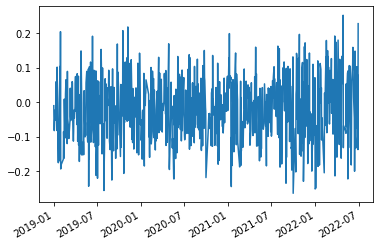

In [21]:
# axis=1 代表对每行求相关系数
IC_series = factor_processed.corrwith(tmr_ret, axis=1)
print(IC_series)
IC_series.plot()  # 噪音较多
#IC_series.cumsum().plot()  # 能看出趋势

## Rank IC

Rank IC：对因子值与明天收益率求 rank，然后计算相关系数。

两个变量求 rank 后计算的相关系数叫 Spearman 相关系数。

<AxesSubplot:>

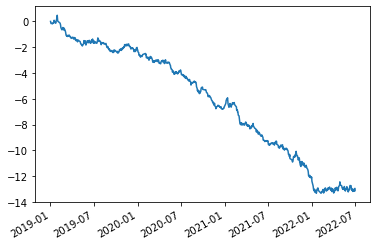

In [22]:
rank_IC_series = factor_processed.corrwith(tmr_ret, axis=1,
                                           method='spearman')

rank_IC_series.cumsum().plot()

## IR 和 胜率

IR：information ratio，IC 的均值与标准差的比值，衡量 IC 稳定性。

胜率：IC 大于 0 的比率，与 0.5 相差越多越好。

In [23]:
IR = rank_IC_series.mean() / rank_IC_series.std()
print(f"IR: {IR}")

win_rate = (rank_IC_series > 0).sum() / rank_IC_series.count()
print(f"win rate: {win_rate}")

IR: -0.15877824676176544
win rate: 0.4444444444444444


## 行业中性

这里仅以行业中性举例。

如果要做市值中性，则需要把原始因子对行业哑变量和市值变量一起回归，回归残差作为新的因子。

In [24]:
industry_info = industry_info.set_index('S_INFO_WINDCODE'
                                       ).reindex(index=stocks)
industry_info

,S_INFO_NAME,S_INFO_LISTDATE,S_INFO_DELISTDATE,S_INFO_LISTBOARDNAME,INDUSTRIESCODE,INDUSTRIESNAME
S_INFO_WINDCODE,,,,,,
000519.SZ,中兵红箭,19931008,NaN,主板,b10c000000000000,国防军工
002690.SZ,美亚光电,20120731,NaN,主板,b10a000000000000,机械
000960.SZ,锡业股份,20000221,NaN,主板,b103000000000000,有色金属
002233.SZ,塔牌集团,20080516,NaN,主板,b108000000000000,建材
600970.SH,中材国际,20050412,NaN,主板,b107000000000000,建筑
...,...,...,...,...,...,...
600787.SH,中储股份,19970121,NaN,主板,b10o000000000000,交通运输
002004.SZ,华邦健康,20040625,NaN,主板,b106000000000000,基础化工
000028.SZ,国药一致,19930809,NaN,主板,b10i000000000000,医药


In [25]:
# 对于每天
# 先按行业，对列分组 —— by=industry_info['INDUSTRIESNAME'], axis=1
# 然后在行业内，对每只股票都减去行业均值 —— x.sub(x.mean(axis=1), axis=0)

factor_indneutral = factor_processed.groupby(
    by=industry_info['INDUSTRIESNAME'],
    axis=1
    ).apply(lambda x: x.sub(x.mean(axis=1), axis=0))

factor_indneutral.head(3)

,000519.SZ,002690.SZ,000960.SZ,002233.SZ,600970.SH,002221.SZ,600282.SH,600755.SH,002249.SZ,600580.SH,...,601991.SH,603156.SH,603707.SH,688208.SH,600120.SH,600787.SH,002004.SZ,000028.SZ,002056.SZ,002002.SZ
2019-01-02,-0.867878,-0.372317,0.411887,-0.090146,-0.607404,0.284062,0.159513,0.854925,-0.878625,-0.228038,...,1.278429,-1.878933,-0.731063,NaN,0.456235,-0.098974,0.020456,0.468371,0.385319,-0.144032
2019-01-03,-0.822565,-0.414673,0.411875,-0.065827,-0.606939,0.290207,0.158044,0.838909,-0.857317,-0.225143,...,1.268062,-1.848808,-0.740928,NaN,0.455773,-0.085583,0.029503,0.493522,0.411214,-0.134109
2019-01-04,-0.824621,-0.395486,0.429286,-0.068310,-0.614407,0.280579,0.160737,0.860921,-0.867734,-0.235893,...,1.268841,-1.866160,-0.753450,NaN,0.468227,-0.074015,0.041139,0.459708,0.436795,-0.139632


<AxesSubplot:>

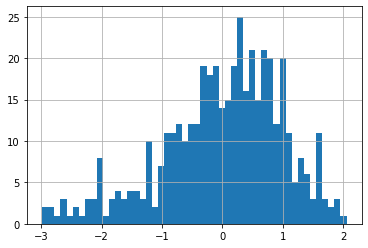

In [26]:
factor_processed.iloc[0].hist(bins=50)


<AxesSubplot:>

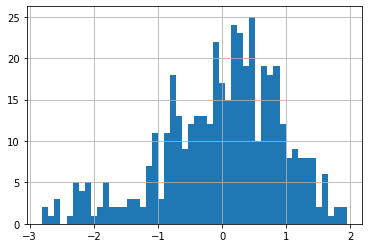

In [27]:
factor_indneutral.iloc[0].hist(bins=50)

<AxesSubplot:>

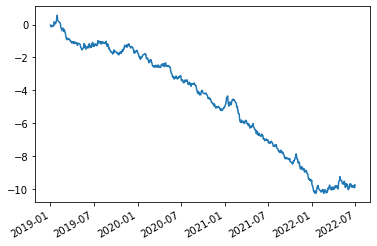

In [28]:
rank_IC_series1 = factor_indneutral.corrwith(tmr_ret, axis=1,
                                             method='spearman')
rank_IC_series1.cumsum().plot()

# 因子回归分析

## OLS 一个截面

In [29]:
import statsmodels.api as sm

In [30]:
# 1 回归一个截面，单变量

X = factor_processed.iloc[0]
X.name = factor_name
X = sm.add_constant(X)  # 添加常数项

y = tmr_ret.iloc[0] 
y.name = 'returns'
# model = sm.OLS(y, X)  # 会报错

In [39]:
not_na = ~(X.isna().any(1) | y.isna())  # 哪些样本是不含缺失值的
print(f"Valid samples: {not_na.sum()}")

# 提取无缺失值的样本
X = X[not_na]
y = y[not_na]

model = sm.OLS(y, X)  # 构建回归模型
result = model.fit()  # 估计回归模型

res = result.summary()  # 回归结果总结，包括三张表格
res.tables[1]  # 回归系数及其显著性表格
res

Valid samples: 442


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04911
Date:                Thu, 19 Jun 2025   Prob (F-statistic):              0.825
Time:                        19:34:39   Log-Likelihood:                 1012.2
No. Observations:                 442   AIC:                            -2020.
Df Residuals:                     440   BIC:                            -2012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0053      0.001     -4.503      0.000      -0.008      -0.003
mv            -0.0003      0.001     -0.222      0.825      -0.003       0.002
==============================================================================
Omnibus:                       46.575   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.181
Skew:                          -0.474   Prob(JB):                     1.63e-30
Kurtosis:                       5.559   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# 2 回归一个截面，加入行业哑变量

industry_dummies = pd.get_dummies(industry_info['INDUSTRIESNAME']
                                 ).reindex(index=stocks)
industry_dummies

,交通运输,传媒,农林牧渔,医药,商贸零售,国防军工,基础化工,家电,建材,建筑,...,纺织服装,综合,综合金融,计算机,轻工制造,通信,钢铁,银行,非银行金融,食品饮料
S_INFO_WINDCODE,,,,,,,,,,,,,,,,,,,,,
000519.SZ,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002690.SZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000960.SZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002233.SZ,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
600970.SH,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600787.SH,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002004.SZ,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000028.SZ,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X = factor_processed.iloc[0]
X.name = factor_name
# 注意，不需要添加常数项
X = pd.concat((X, industry_dummies), axis=1)

y = tmr_ret.iloc[0]
y.name = 'returns'

not_na = ~(X.isna().any(1) | y.isna())  # 哪些样本是不含缺失值的
print(f"Valid samples: {not_na.sum()}")

# 提取无缺失值的样本
X = X[not_na]
y = y[not_na]

model = sm.OLS(y, X)  # 构建回归模型
result = model.fit()  # 估计回归模型

res = result.summary()  # 回归结果总结，包括三张表格
res.tables[1]  # 回归系数及其显著性表格

Valid samples: 442


,coef,std err,t,P>|t|,[0.025,0.975]
mv,-0.0007,0.001,-0.634,0.527,-0.003,0.001
交通运输,-0.0087,0.005,-1.929,0.054,-0.018,0.000
传媒,-0.0098,0.005,-2.005,0.046,-0.019,-0.000
农林牧渔,-0.0086,0.007,-1.324,0.186,-0.021,0.004
医药,-0.0189,0.003,-6.444,0.000,-0.025,-0.013
商贸零售,0.0008,0.007,0.117,0.907,-0.012,0.014
国防军工,0.0305,0.005,6.249,0.000,0.021,0.040
基础化工,-0.0118,0.004,-3.058,0.002,-0.019,-0.004
家电,-0.0203,0.007,-2.933,0.004,-0.034,-0.007
建材,-0.0181,0.008,-2.144,0.033,-0.035,-0.002


## OLS 所有截面

In [43]:
# 回归所有截面
from tqdm.notebook import tqdm  # 进度条工具

n_periods = len(factor_processed) - 1
coefs = []
tvalues = []

for i in tqdm(range(n_periods)):
    
    X = factor_processed.iloc[i]
    X.name = factor_name
    # 注意，不需要添加常数项
    X = pd.concat((X, industry_dummies), axis=1)

    y = tmr_ret.iloc[i]
    y.name = 'returns'

    not_na = ~(X.isna().any(1) | y.isna())  # 哪些样本是不含缺失值的
#     print(f"{i+1}/{n_periods} Valid samples: {not_na.sum()}")

    # 提取无缺失值的样本
    X = X[not_na]
    y = y[not_na]

    model = sm.OLS(y, X)  # 构建回归模型
    result = model.fit()  # 估计回归模型

    # 获取回归系数和显著性
    coefs.append(result.params[factor_name])
    tvalues.append(result.tvalues[factor_name])

<AxesSubplot:>

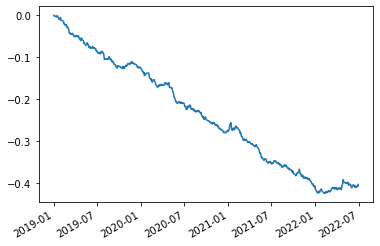

In [44]:
pd.Series(coefs, index=factor_processed.index[:-1]
         ).cumsum().plot()

t 值绝对值大于 2 的个数：236 / 846


<AxesSubplot:>

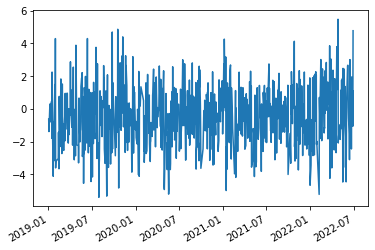

In [45]:
n_gt_2 = len([t for t in tvalues if abs(t) > 2])
print(f"t 值绝对值大于 2 的个数：{n_gt_2} / {n_periods}")

pd.Series(tvalues, index=factor_processed.index[:-1]
         ).plot()

## 非日频

In [46]:
factor_processed_monthly = factor_processed.resample(rule='M').last()
factor_processed_monthly.tail()

,000519.SZ,002690.SZ,000960.SZ,002233.SZ,600970.SH,002221.SZ,600282.SH,600755.SH,002249.SZ,600580.SH,...,601991.SH,603156.SH,603707.SH,688208.SH,600120.SH,600787.SH,002004.SZ,000028.SZ,002056.SZ,002002.SZ
2022-02-28,0.934329,-0.978403,1.500312,-0.821756,-0.226967,-0.195175,-0.296983,-0.590895,-0.948272,0.033856,...,1.159270,1.022717,1.567023,-0.615286,-0.880805,-0.891313,-1.058653,-0.928973,0.651070,-0.317059
2022-03-31,1.064970,-1.381896,1.278718,-0.628678,-0.158522,-0.492769,-0.228624,-0.281275,-1.057964,-0.108803,...,0.949378,0.927288,1.489274,-1.037070,-0.751348,-0.856684,-0.918501,-0.727869,0.352090,-0.339790
2022-04-30,1.090782,-1.424808,1.147338,-0.813903,-0.323056,-0.710689,-0.017772,-0.123176,-1.163452,-0.238315,...,1.050071,1.098434,1.276831,-1.390046,-0.784685,-0.554710,-1.055412,-0.799310,0.777090,-0.746187
2022-05-31,1.301476,-1.443081,0.917040,-0.945686,-0.290931,-0.574859,-0.364555,-0.147007,-1.105187,-0.135885,...,1.100475,0.860999,1.283153,-1.372179,-0.818989,-0.529938,-1.029334,-0.936558,1.409297,-0.810301
2022-06-30,1.477788,-1.316031,0.769991,-1.090815,-0.193471,-0.515739,-0.542451,-0.395631,-1.084047,0.013665,...,0.910331,0.821530,1.196102,-1.390260,-0.907163,-0.790373,-1.139422,-1.018643,1.575844,-0.914762


In [47]:
ret_monthly = ret.resample(rule='M').sum()
ret_monthly.tail()

,000519.SZ,002690.SZ,000960.SZ,002233.SZ,600970.SH,002221.SZ,600282.SH,600755.SH,002249.SZ,600580.SH,...,601991.SH,603156.SH,603707.SH,688208.SH,600120.SH,600787.SH,002004.SZ,000028.SZ,002056.SZ,002002.SZ
2022-02-28,0.216366,0.076168,0.230646,0.070323,-0.011781,0.073677,0.046900,0.040642,0.069560,0.032590,...,0.077252,0.009628,-0.032765,-0.173094,0.088699,0.019847,0.012416,0.017332,0.071748,0.037692
2022-03-31,0.015263,-0.289542,-0.161985,0.014300,-0.041593,-0.223781,-0.040711,0.079340,-0.146378,-0.144309,...,-0.169014,-0.112013,-0.088340,-0.293186,-0.012175,-0.063255,-0.013368,0.023727,-0.217397,-0.086125
2022-04-30,-0.060457,-0.154750,-0.134728,-0.148864,-0.195584,-0.231445,0.003786,-0.025636,-0.179595,-0.171955,...,-0.031079,0.003132,-0.189341,-0.307123,-0.139624,0.058758,-0.197513,-0.158218,0.137064,-0.322919
2022-05-31,0.186504,0.107767,-0.039859,0.008390,0.095483,0.153930,-0.023095,0.065765,0.112334,0.131781,...,0.094714,0.029055,0.073807,0.096651,0.060289,0.091797,0.095789,0.007742,0.434781,0.046359
2022-06-30,0.167139,0.149980,-0.001181,0.002462,0.167400,0.111423,-0.018196,0.009904,0.098363,0.166443,...,-0.028747,0.049188,0.024900,0.105404,0.047808,-0.059770,0.062296,0.056343,0.181683,0.025698


In [48]:
ret_monthly_next = ret_monthly.shift(-1)
ret_monthly_next.tail()

,000519.SZ,002690.SZ,000960.SZ,002233.SZ,600970.SH,002221.SZ,600282.SH,600755.SH,002249.SZ,600580.SH,...,601991.SH,603156.SH,603707.SH,688208.SH,600120.SH,600787.SH,002004.SZ,000028.SZ,002056.SZ,002002.SZ
2022-02-28,0.015263,-0.289542,-0.161985,0.014300,-0.041593,-0.223781,-0.040711,0.079340,-0.146378,-0.144309,...,-0.169014,-0.112013,-0.088340,-0.293186,-0.012175,-0.063255,-0.013368,0.023727,-0.217397,-0.086125
2022-03-31,-0.060457,-0.154750,-0.134728,-0.148864,-0.195584,-0.231445,0.003786,-0.025636,-0.179595,-0.171955,...,-0.031079,0.003132,-0.189341,-0.307123,-0.139624,0.058758,-0.197513,-0.158218,0.137064,-0.322919
2022-04-30,0.186504,0.107767,-0.039859,0.008390,0.095483,0.153930,-0.023095,0.065765,0.112334,0.131781,...,0.094714,0.029055,0.073807,0.096651,0.060289,0.091797,0.095789,0.007742,0.434781,0.046359
2022-05-31,0.167139,0.149980,-0.001181,0.002462,0.167400,0.111423,-0.018196,0.009904,0.098363,0.166443,...,-0.028747,0.049188,0.024900,0.105404,0.047808,-0.059770,0.062296,0.056343,0.181683,0.025698
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
